**DSCI100 Project Proposal**

Introduction:
Every day, children and adults around the world suffer from a medical complication known as a stroke. A stroke is when there’s disruption in the blood supply to the brain. Strokes can have serious and potentially life-threatening consequences, as they can lead to brain damage, disability, or even death. There are several factors that contribute to a person’s chances of getting a stroke which include: blood pressure levels, BMI, smoking, physical activity, age, and more. Our project aims to predict the likelihood of someone getting a stroke based on a person’s age and stress levels. We want to attempt to answer the following questions: How does age and stress levels affect the risks of getting a stroke?

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [12]:
stroke <- read_csv("https://raw.githubusercontent.com/Megunight/dsci100-project/main/stroke_prediction_dataset.csv")

Rows: 15000 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): Patient Name, Gender, Marital Status, Work Type, Residence Type, S...
dbl  (8): Patient ID, Age, Hypertension, Heart Disease, Average Glucose Leve...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [14]:
names(stroke) <- c("patient_id", "patient_name", "age", "gender", "hypertension", "heart_disease", "marital_status",
                  "work_type", "residence_type", "average_glucose_level", "bmi", "smoking_status", "alcohol_intake", "physical_activity",
                  "stroke_history", "family_history_of_stroke", "dietary_habits", "stress_levels", "blood_pressure_levels",
                  "cholesterol_levels", "symptoms", "diagnosis")
head(stroke)

patient_id,patient_name,age,gender,hypertension,heart_disease,marital_status,work_type,residence_type,average_glucose_level,⋯,alcohol_intake,physical_activity,stroke_history,family_history_of_stroke,dietary_habits,stress_levels,blood_pressure_levels,cholesterol_levels,symptoms,diagnosis
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,⋯,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,⋯,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,⋯,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,⋯,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Headache, Confusion",No Stroke
48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,⋯,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
29307,Advika Kota,62,Female,0,0,Single,Private,Urban,91.60,⋯,Social Drinker,High,0,No,Gluten-Free,4.85,132/64,"HDL: 80, LDL: 69",Severe Fatigue,Stroke


In [16]:
#Seven different variables have been selected for use

stroke_selected <- stroke |>
                    select(age,
                           hypertension,
                           stress_levels,
                           diagnosis)

In [17]:
stroke_sample <- stroke_selected |>
                sample_n(5000)

Due to the large number of rows in the stroke data set, we decided to sample 5000 random rows from the data set to ensure that our visualizations wouldn't be overwhelmed with data points.

In [18]:
stroke_split <- initial_split(stroke_sample, prop = 0.75, strata = diagnosis)
stroke_training <- training(stroke_split)
stroke_testing <- testing(stroke_split)

stroke_training

age,hypertension,stress_levels,diagnosis
<dbl>,<dbl>,<dbl>,<chr>
75,1,9.65,No Stroke
58,0,8.72,No Stroke
77,0,0.07,No Stroke
26,0,8.36,No Stroke
37,1,0.88,No Stroke
83,0,1.52,No Stroke
40,0,7.96,No Stroke
21,0,5.07,No Stroke
85,1,7.32,No Stroke


In [38]:
stroke_training <- stroke_training |>
  mutate(stress_level_category = case_when(
    stress_levels <= 2.5 ~ "Low",
    stress_levels > 2.5 & stress_levels <= 5.0 ~ "Moderate",
    stress_levels > 5.0 & stress_levels <= 7.5 ~ "High",
    stress_levels > 7.5 ~ "Very High") )


stroke_training <- stroke_training |>
    mutate(age_group = cut(age, breaks = seq(0, 100, by = 10), labels = seq(0, 90, by = 10), right = FALSE)) |>
    mutate(hypertension = as_factor(hypertension)) |>
    mutate(hypertension = fct_recode(hypertension, "False" = "0", "True" = "1"))


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `hypertension = fct_recode(hypertension, False = "0", True =
  "1")`.
Caused by warning:
! Unknown levels in `f`: 0, 1”


We split the data set into a training set and testing set. After that, we mutated stress levels and age into categories because there are too many values too plot.

In [20]:
stroke_obs <- stroke_training |>
                group_by(diagnosis) |>
                summarise(count = n())
stroke_obs


diagnosis,count
<chr>,<int>
No Stroke,1898
Stroke,1851


This table summarizes the count of the diagnostics of people who have had a stroke or no stroke.

Warning message in geom_histogram(stat = "count", position = "dodge"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "count", position = "dodge"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


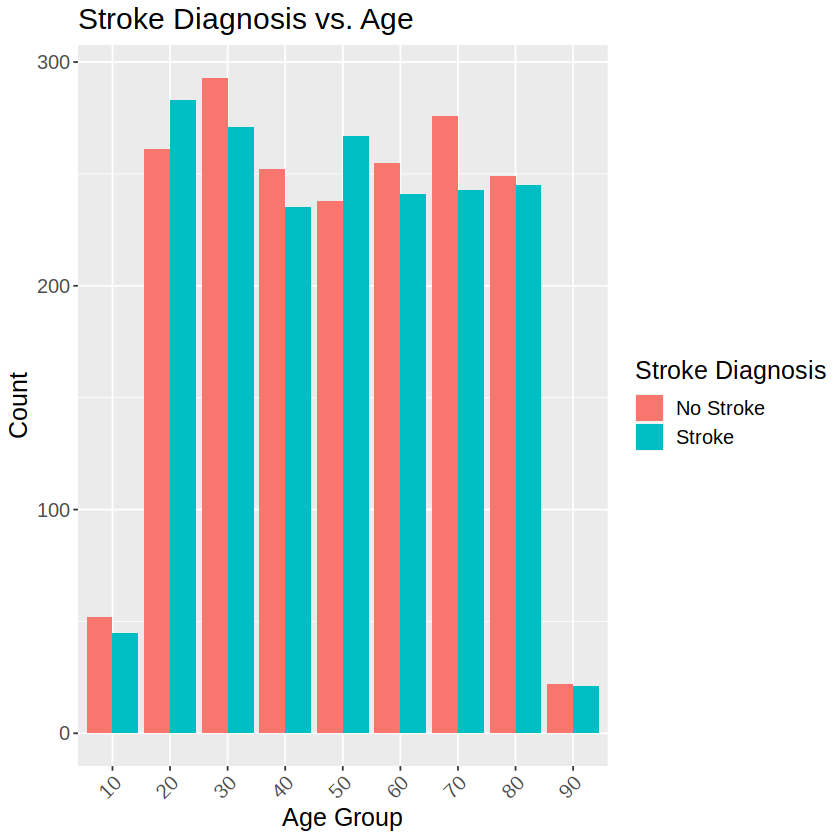

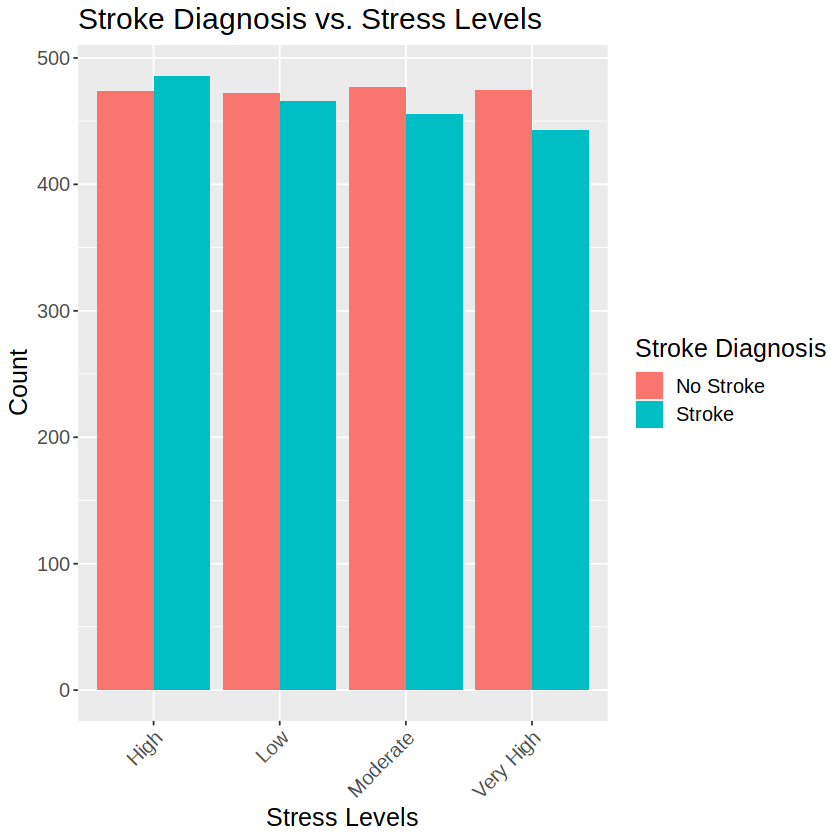

In [36]:
set.seed(560)
options(repr.plot.width = 7, repr.plot.height = 7)

stroke_age <- stroke_training |>
            ggplot(aes(x = age_group, fill = diagnosis)) +
            geom_histogram(stat = "count", position = "dodge") +
            labs(x = "Age Group", y = "Count", fill = "Stroke Diagnosis") +
            ggtitle("Stroke Diagnosis vs. Age") +
            theme(text = element_text(size = 15))  +
            theme(axis.text.x = element_text(angle = 45, hjust = 1))
stroke_age

stroke_stress <- stroke_training |>
            ggplot(aes(x = stress_level_category, fill = diagnosis)) +
            geom_histogram(stat = "count", position = "dodge") +
            labs(x = "Stress Levels", y = "Count", fill = "Stroke Diagnosis") +
            ggtitle("Stroke Diagnosis vs. Stress Levels") +
            theme(text = element_text(size = 15))  +
            theme(axis.text.x = element_text(angle = 45, hjust = 1))
stroke_stress

We made a histogram for hypertension to compare the number of people with and without hypertension who have suffered from a stroke. Although we had hypothesized that abnormal blood pressure levels could affect a persons risk of getting a stroke, we weren’t expecting this kind of outcome. If a person doesn’t have hypertension, they are more likely to get a stroke than a person who does. In fact, more people with hypertension don’t get strokes than those who do.

**Methods:**

Our dataset contains 19 predictors for stroke probability. We will use age and stress levels for prediction. From outside research, it seems like age can affect a person’s arteries, which directly increases one’s chance of getting a stroke. Stress levels cause the heart to work harder, which increases the risks of clots forming and causing a stroke. Since we already know blood pressure levels directly cause strokes, we want to investigate seemingly related, but not confirmed factors. Since we are using multiple predictors, we have no way to visualize it on a 2D plane, so we decided to use the k-nearest neighbours algorithm to perform classification prediction.  

**Expected Outcomes and Significance:**


We expect to find correlation between some of theses variables, and that all the variables play a big part in predicting strokes. Some of these variables lead to outside factors such as economic status and mental wellbeing, etc. If we can accurately predict strokes based on these variables, it can prove the connection between personal wellbeing and strokes, which can influence policies aimed for health. This can also lead to future questions such as to what extent is there correlation between these variables and others outside the scope of our project, and how could that influence the prediction of strokes. 